In [17]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [85]:
stream = cv2.VideoCapture(os.path.join('assets', 'tracking.avi'))
_, frame = stream.read()
stream.release()

In [18]:
frame = np.array(Image.open(os.path.join('..', 'assets', 'background_light_20fps_gerbil.png')))
bg = np.array(Image.open(os.path.join('..', 'assets', 'background_light_20fps.png')))
#bg = np.array(im_frame).reshape((1024, 1280, 3)).astype(np.uint8)

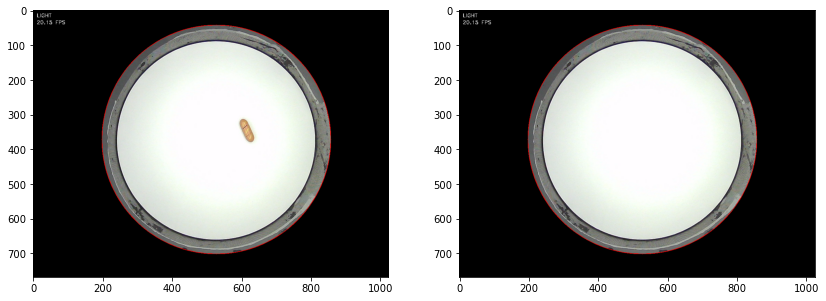

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(14, 12))
axes[0].imshow(frame)
axes[1].imshow(bg)

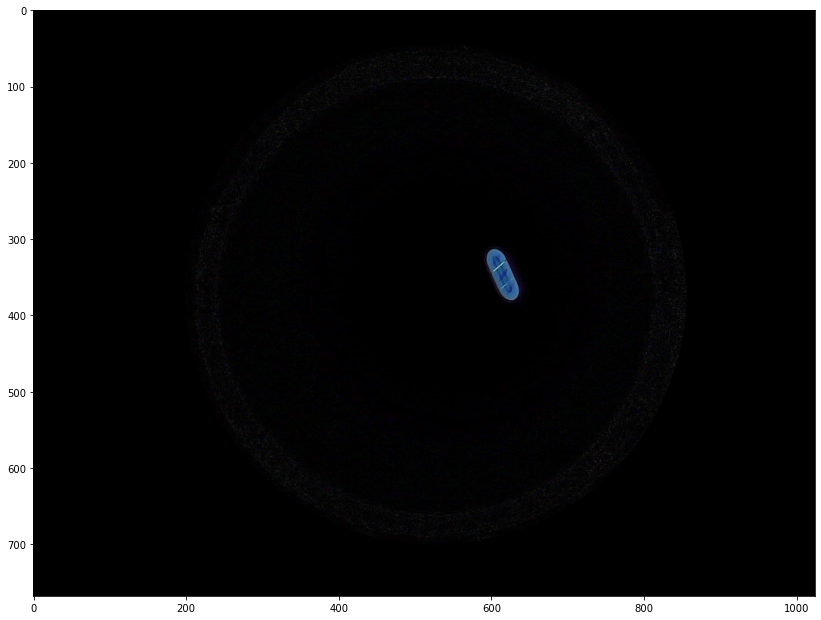

In [25]:
substracted = cv2.absdiff(frame, bg )
fig, ax = plt.subplots(figsize=(14, 14))
ax.imshow(substracted)

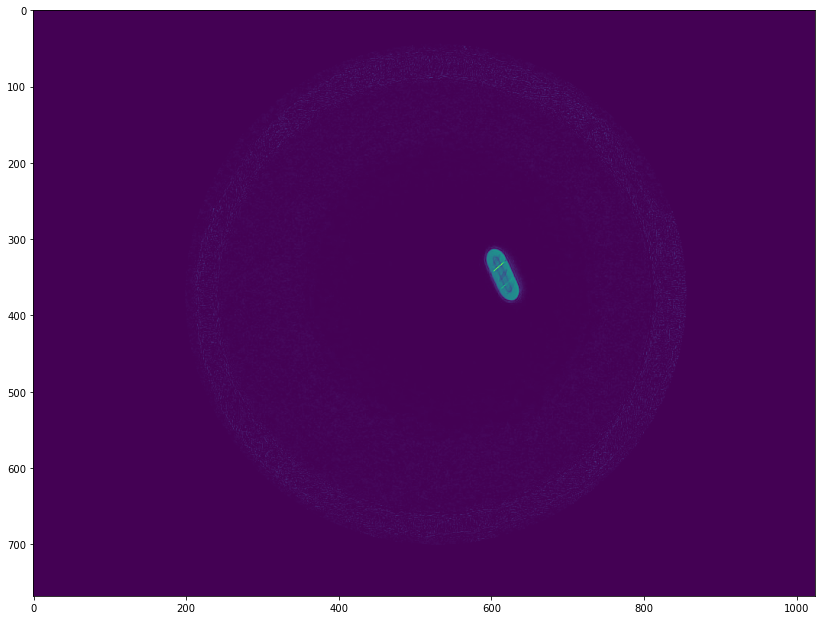

In [16]:
grey = cv2.cvtColor(substracted, cv2.COLOR_BGR2GRAY)
fig, ax = plt.subplots(figsize=(14, 14))
ax.imshow(grey)

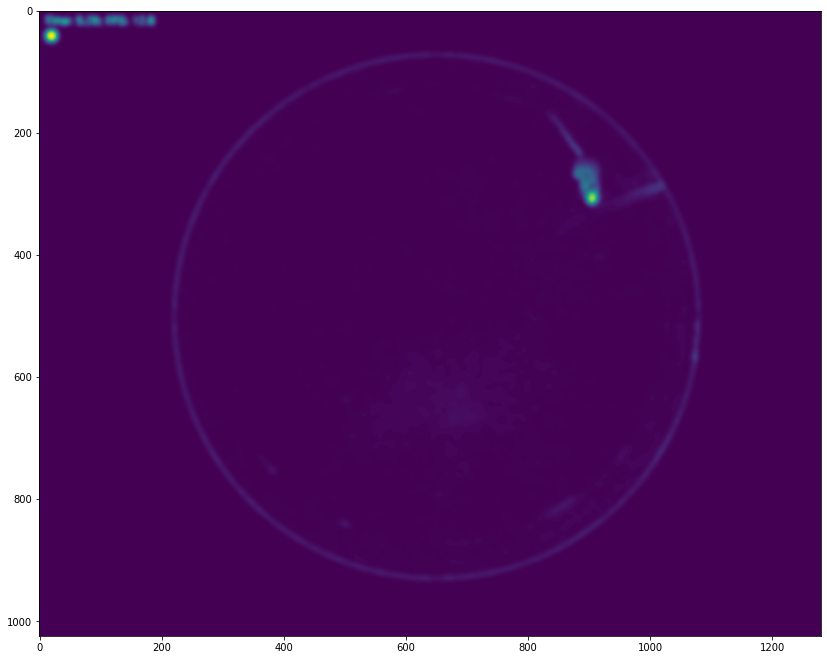

In [90]:
kernel_size = (25,25)
blurred = cv2.GaussianBlur(grey, kernel_size, 0)
fig, ax = plt.subplots(figsize=(14, 14))
ax.imshow(blurred)

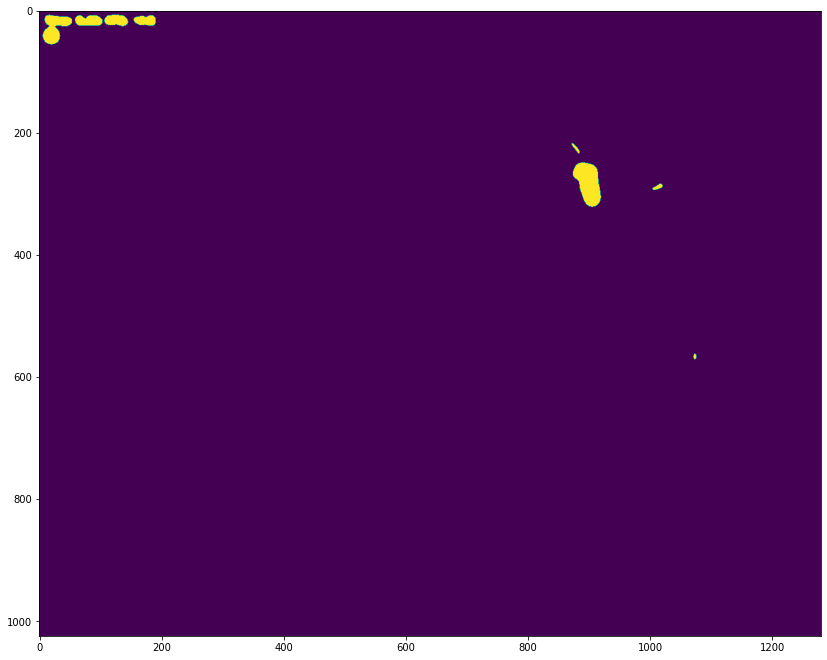

In [91]:
# https://docs.opencv.org/4.5.2/d7/d4d/tutorial_py_thresholding.html
_, thresh = cv2.threshold(blurred, 20, 255, cv2.THRESH_BINARY)
fig, ax = plt.subplots(figsize=(14, 14))
ax.imshow(thresh)

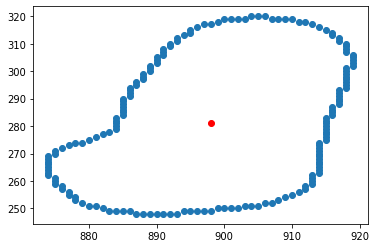

In [92]:
# https://docs.opencv.org/4.5.2/d4/d73/tutorial_py_contours_begin.html
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
contour = contours[np.argmax(list(map(cv2.contourArea, contours)))]

M = cv2.moments(contour)
x = int(M['m10'] / M['m00'])
y = int(M['m01'] / M['m00'])
x, y

plt.scatter(contour[:, 0, 0], contour[:, 0, 1])
plt.scatter(x, y, color='red')